In [1]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog

# DISPLAY IMAGES

In [2]:
#import training dataset of vehicles/non-vehicles
import glob
cashew = glob.glob('data/cashew/*.png')
no_cashew = glob.glob('data/no_cashew/*.png')

In [4]:
len(cashew)

251

In [5]:
len(no_cashew)

213

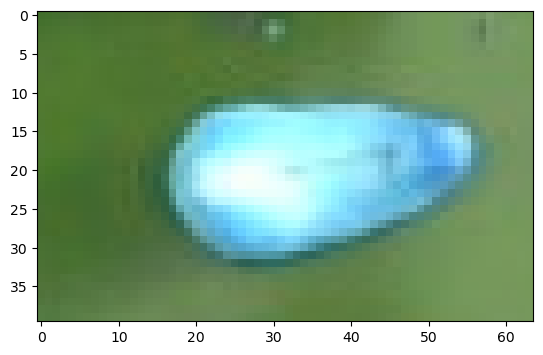

In [7]:
image_color = cv2.imread(cashew[230]) 
plt.imshow(image_color)

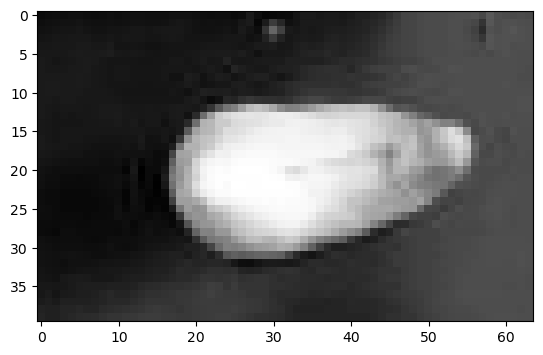

In [8]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

# GET HOG FEATURES

In [9]:
features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)

features.shape 

(132,)

In [10]:
hog_image.shape

(40, 64)

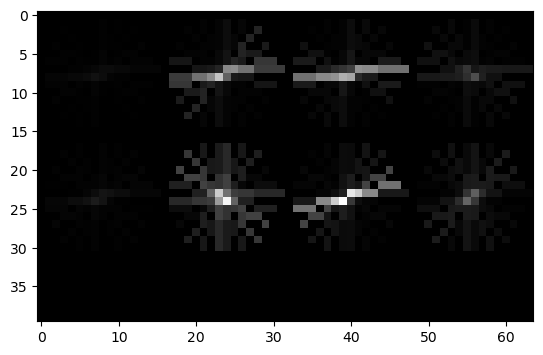

In [11]:
plt.imshow(hog_image, cmap = 'gray')

# HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION

HOG with cashew

In [12]:
cashew_hog_accum = []
for i in cashew:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    cashew_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
    cashew_hog_accum.append(cashew_hog_feature)

In [13]:
X_cashew = np.vstack(cashew_hog_accum).astype(np.float64)  
y_cashew = np.ones(len(X_cashew))

In [15]:
X_cashew.shape

(251, 132)

In [17]:
y_cashew.shape

(251,)

HOG with no cashew

In [18]:
nocashew_hog_accum = []
for i in no_cashew:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    nocashew_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
    nocashew_hog_accum.append(nocashew_hog_feature)

In [19]:
X_nocashew = np.vstack(nocashew_hog_accum).astype(np.float64)  
y_nocashew = np.zeros(len(X_nocashew))

In [20]:
X_nocashew.shape

(213, 132)

In [21]:
y_nocashew.shape

(213,)

Ghép 2 cái lại

In [22]:
X = np.vstack((X_cashew, X_nocashew))
X.shape

(464, 132)

In [23]:
y = np.hstack((y_cashew, y_nocashew))
y.shape

(464,)

# SVM MODEL CLASSIFIER TRAINING 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

LinearSVC()

<AxesSubplot: >

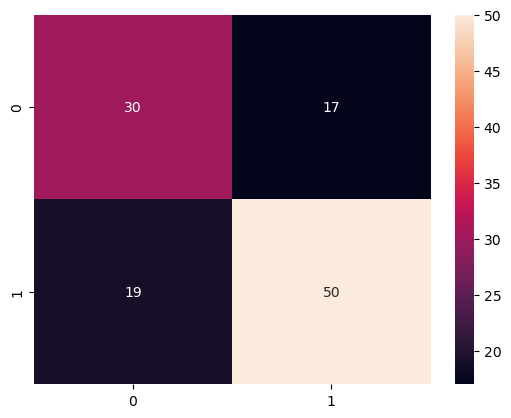

In [26]:
y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62        47
         1.0       0.75      0.72      0.74        69

    accuracy                           0.69       116
   macro avg       0.68      0.68      0.68       116
weighted avg       0.69      0.69      0.69       116



# IMPROVE THE MODEL 

In [28]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.529 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

SVC(C=1, gamma=1)

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        47
         1.0       0.86      0.81      0.84        69

    accuracy                           0.81       116
   macro avg       0.80      0.81      0.81       116
weighted avg       0.81      0.81      0.81       116



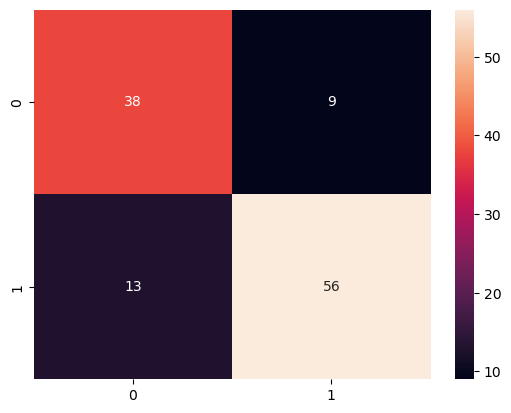

In [29]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# TEST THE MODEL (FIND CARS)!

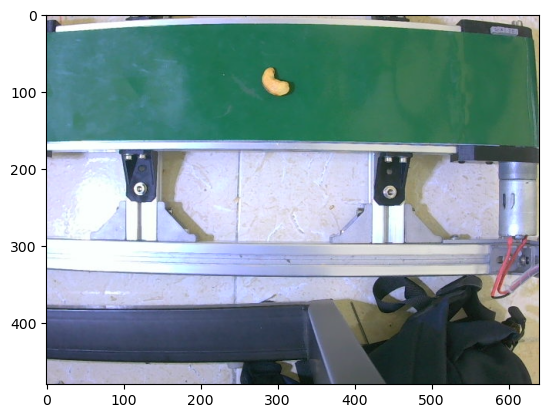

In [240]:
test_image = mpimg.imread('data/raw_data/frame_208.png')
test_image = test_image.astype(np.float32)
plt.imshow(test_image)

(165, 640, 3)

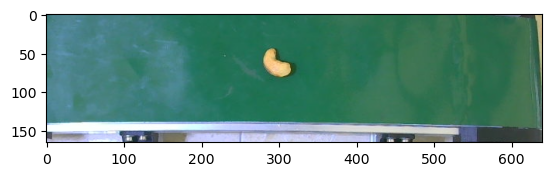

In [241]:
h_start = 25
h_stop = 190

pixels_in_cell = 16
HOG_orientations = 11


masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape

In [242]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(82, 320, 3)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3232\810096792.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))


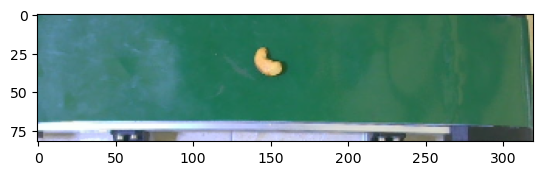

In [243]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)

In [244]:
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False) 

(82, 320)


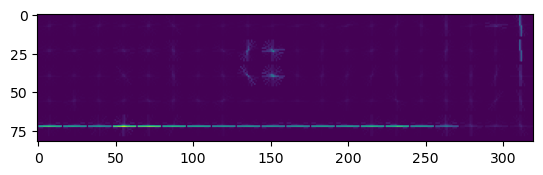

In [245]:
plt.imshow(hog_img)

In [246]:
masked_region_hog_feature_all.shape

(4, 19, 2, 2, 11)

In [247]:
cells_in_step = 2

n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

blocks_in_window_y = (40 // pixels_in_cell)-1 
blocks_in_window_x = (64 // pixels_in_cell)-1
#nfeat_per_block = orientations * cells_in_block **2 

blocks_in_window = (64 // pixels_in_cell)-1 
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []
for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window_y, x_position : x_position + blocks_in_window_x].ravel()
        region_image = test_image[y_position : y_position + blocks_in_window_y, x_position : x_position + blocks_in_window_x]
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predict using trained SVM
        #test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))

(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)
(132,)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3232\3351674622.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rectangle_x_left = np.int(x_left * resizing_factor)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3232\3351674622.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check 

In [248]:
rectangles_found

[((0, 25), (128, 153)),
 ((64, 25), (192, 153)),
 ((192, 25), (320, 153)),
 ((320, 25), (448, 153)),
 ((384, 25), (512, 153)),
 ((448, 25), (576, 153)),
 ((512, 25), (640, 153))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


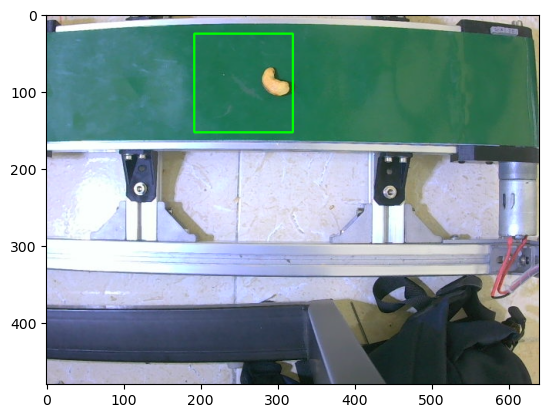

In [249]:
Image_with_Rectangles_Drawn = np.copy(test_image)

rectangle = rectangles_found[2]
cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 2)

plt.imshow(Image_with_Rectangles_Drawn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


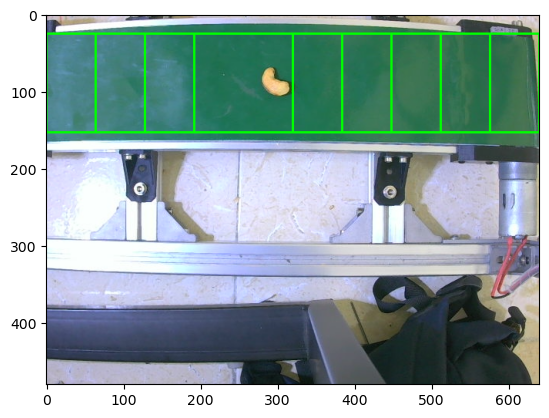

In [250]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 2)

plt.imshow(Image_with_Rectangles_Drawn)